In [1]:
import ROOT
from ROOT import gROOT, TCanvas, TF1, TFile, TTree, gRandom, TH1F
import numpy as np
import sys

Welcome to ROOTaaS 6.06/02


In [2]:
from tools import *

In [3]:
gROOT.Reset()
c1 = TCanvas( 'c1', 'Tests', 200, 10, 700, 500 )

In [4]:
path = '/Users/gabrielsantucci/Dropbox/PhD/SK/fiTQun_analysis/Knu_muGamma/atmnu/multiring/'
files = path + 'files/'

In [5]:
pdk = GetTree(path=files, f1='pdk/pdk_100k.root', f2='pdk/pdk_100k_new3.root')

In [6]:
atm = GetTree(path=files, f1='atm/atm_100years.root', f2='atm/atm_100years_new.root',
             tree1='h1', tree2='treePDK')

In [7]:
sample = 'FCFV && fqnse == 2'
mg = ' && MuGamma'

[(200, 0, 200, 4000), (300, 0, 300, 4000)]
(200, 0, 200, 4000)
<ROOT.TLine object ("TLine") at 0x11f635390>
(300, 0, 300, 4000)
<ROOT.TLine object ("TLine") at 0x123b2eef0>


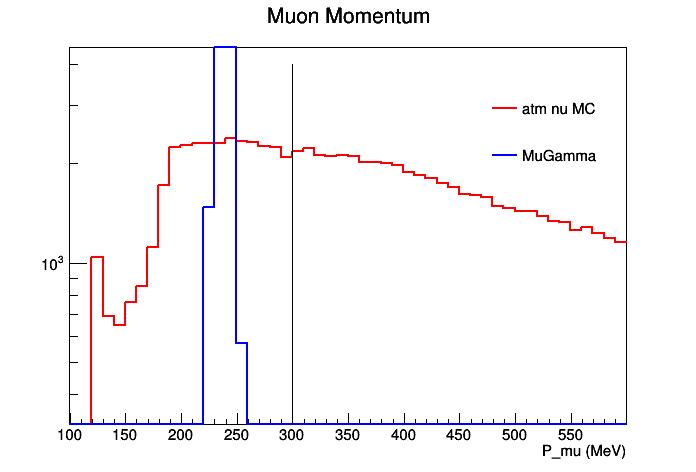

In [8]:
var = 'FQptotMu'
cut = sample # + ' && fqmrnring[0] < 3'
nbins = 50
xmin = 99.5
xmax = 599.5
title = 'Muon Momentum'
xlabel = 'P_mu (MeV)'
save=False
leg = ['atm nu MC', 'MuGamma']
line=[(200,0,200,4000), (300,0,300,4000)]

canvas = Draw2Hists(c1, tree1=atm, tree2=pdk, var=var, cut1=cut, cut2=cut+mg,
               nbins=nbins, xmin=xmin, xmax=xmax,
               title=title, xlabel=xlabel, ylabel='',
               col1=2, col2=4, log=True, norm=False, save=save, stats=False, leg=leg, line=line)

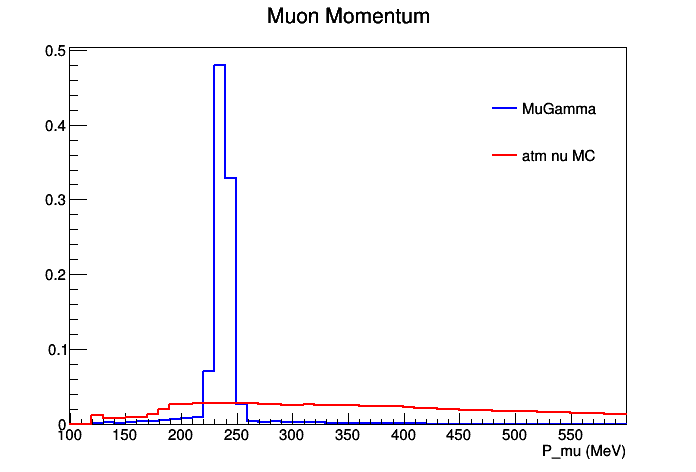

In [9]:
leg.reverse()
canvas = Draw2Hists(c1, tree1=pdk, tree2=atm, var=var, cut1=cut+mg, cut2=cut,
               nbins=nbins, xmin=xmin, xmax=xmax,
               title=title, xlabel=xlabel, ylabel='',
               col1=4, col2=2, log=False, norm=True, save=save, stats=False, leg=leg)

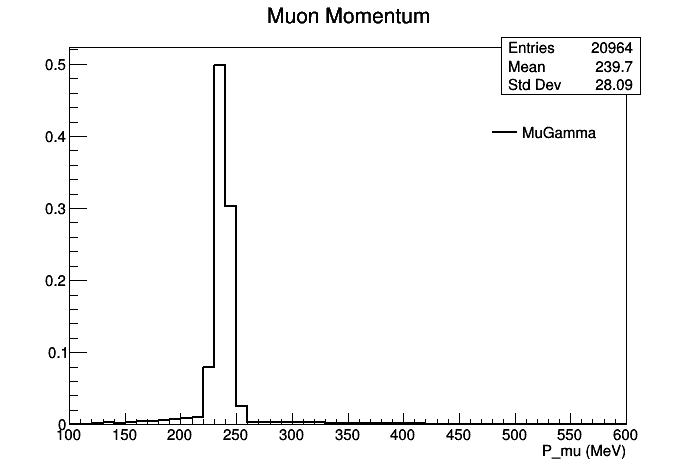

In [10]:
var = 'FQptotMu'
cut = sample # + ' && fqmrnring[0] < 3'
nbins = 50
xmin = 100
xmax = 600
title = 'Muon Momentum'
xlabel = 'P_mu (MeV)'
save=False
leg = ['MuGamma']

canvas = DrawHist(c1, tree=pdk, var=var, cut=cut+mg,
               nbins=nbins, xmin=xmin, xmax=xmax,
               title=title, xlabel=xlabel, ylabel='',
               log=False, norm=True, save=save, stats=True, leg=leg)

In [11]:
h1 = Hist('h1', nbins, xmin, xmax, title, xlabel, '')

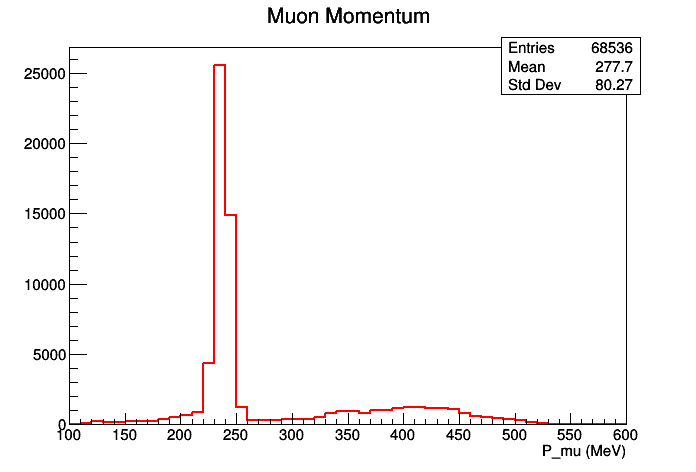

In [12]:
h1.SetLineColor(2)
h1.SetLineWidth(2)
pdk.Draw('{}>>h1'.format(var), cut, '')
h1.Draw()
c1.Draw()